In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Read xlsx files into DF
startups = pd.read_excel('/content/P11-1000-Startups.xlsx')
Financials = pd.read_excel('/content/P11-1000-Startups.xlsx', sheet_name= 'Financials')

In [ ]:
#Joining Dataframes into one DF
data = startups.join(Financials, on = 'ID', how = 'left', rsuffix = '_F')

In [ ]:
data.drop(columns = ['ID_F','Name_F'], inplace = True)

In [ ]:
#Add avg into each row in DF
startups['Avg_no_of_employees'] = startups.groupby('Industry')['Employees'].transform(np.mean).round(0)

In [ ]:
data.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,5448571.0,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,2007778.0,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,1857830.0,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01


In [ ]:
startups.head()

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,119.0
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,108.0
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,154.0
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",204.0
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",331.0


In [ ]:
Financials.head()

,ID,Name,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,2,Unimattax,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,3,Lexila,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,4,Greenfax,7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,5,Saoace,10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75


In [ ]:
industries = startups.groupby('Industry').size().sort_values(ascending = False)

In [ ]:
industries = pd.DataFrame(industries)

In [ ]:
#industries.reset_index(inplace=True)
industries.rename(columns={0:'Number'}, inplace=True)


In [ ]:
industries

,Number
Industry,
IT Services,147
Health,88
Software,87
Business Products & Services,67
Advertising & Marketing,65
Financial Services,54
Government Services,50
Construction,49
Retail,48


Let's find the earliest founded startups each industry

In [ ]:
earliest_startups = pd.DataFrame(columns = startups.columns.to_list())

In [ ]:
earliest_startups

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees


In [ ]:
industry_grup = startups.groupby('Industry')

In [ ]:
# Find the earliest founded startup in each industry
for industry, year in industry_grup:
  the_min_year = year.nsmallest(n=1, columns = 'Year Founded')
  earliest_startups = earliest_startups.append(the_min_year)

In [ ]:
# Optional export data to xlsx file
earliest_startups.to_excel('earliest_startups.xlsx')

In [ ]:
earliest_startups.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
291,292,Fintax,Advertising & Marketing,Provides a comprehensive lead serivce package ...,2000,12,IL,Chicago,Chicago,55.0
111,112,Keycone,Business Products & Services,Develops online systems that give health insur...,2000,62,CT,Madison,"New Haven-Milford, CT",95.0
56,57,Tindex,Computer Hardware,Provides clients with a streamlined purchasing...,2011,11,MN,Spring Park,Minneapolis,49.0


Let's check which industry hire the highest number of employees

In [ ]:
indus = startups.groupby('Industry').agg({'Employees': [np.mean, np.sum]})

In [ ]:
indus.columns = [x + y.capitalize() for x,y in indus.columns.values]

In [ ]:
#indus.reset_index(inplace=True)
indus.rename(columns={'EmployeesMean':'Employees_Mean', 'EmployeesSum':'Employees_Sum'}, inplace=True)

In [ ]:
indus.reset_index(inplace = True)

In [ ]:
indus['Employees_Mean'] = indus['Employees_Mean'].round(0)

In [ ]:
indus

,Industry,Employees_Mean,Employees_Sum
0,Advertising & Marketing,55.0,3550
1,Business Products & Services,95.0,6367
2,Computer Hardware,49.0,196
3,Construction,58.0,2839
4,Consumer Products & Services,132.0,5928
5,Education,57.0,963
6,Energy,331.0,7273
7,Engineering,117.0,1983
8,Environmental Services,78.0,702
9,Financial Services,207.0,11191


Text(Health, 18000, 'Highest point - Health industry')

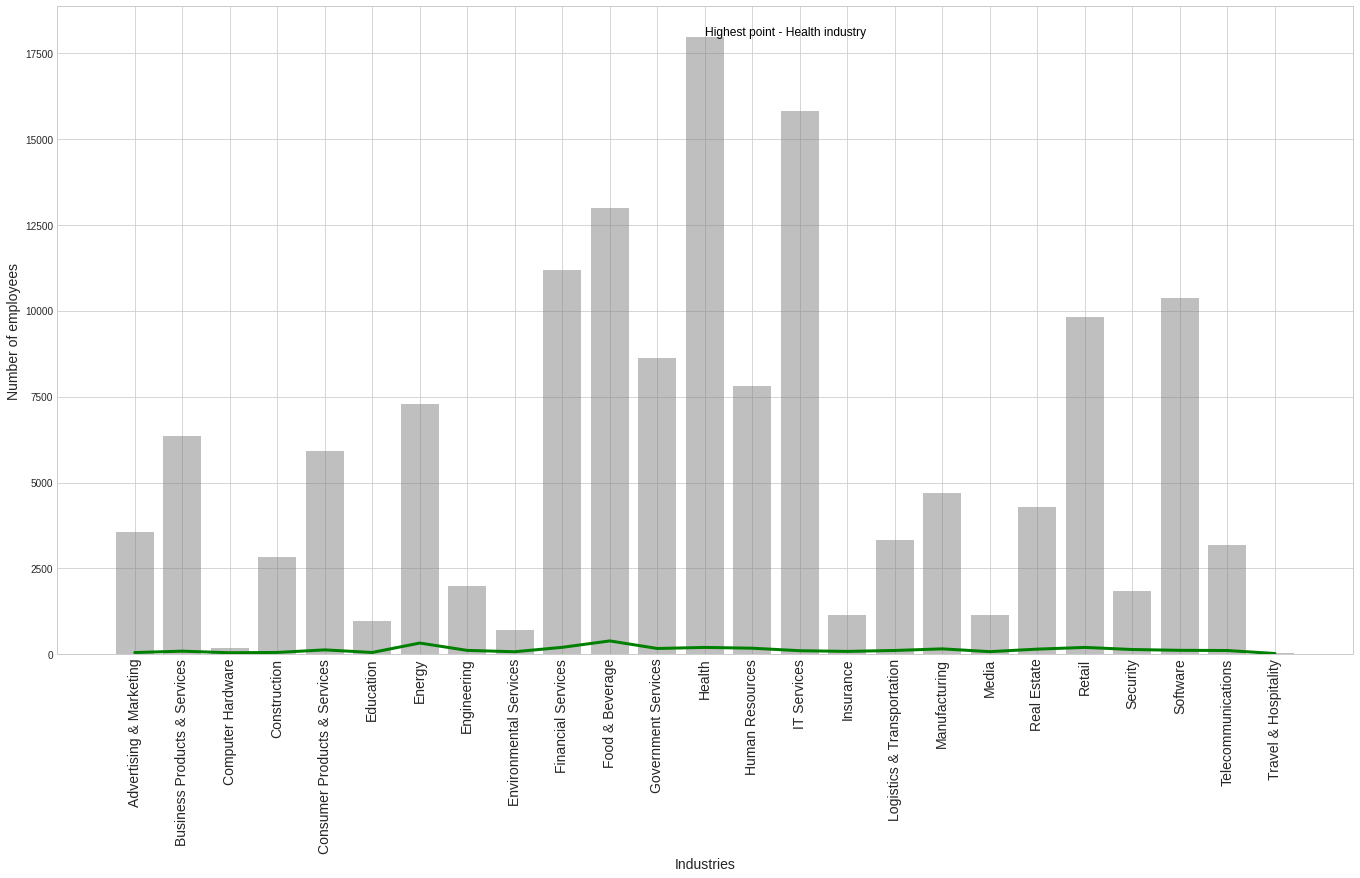

In [ ]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])

x1 = indus['Industry']
x2 = indus['Employees_Mean']
x3 = indus['Employees_Sum']
plt.xticks(rotation=90, size = 14) 
plt.ylabel('Number of employees', size = 14)
plt.xlabel('Industries', size = 14)
ax.plot(x1,x2, color = 'g', linewidth=3.0)
ax.bar(x1,x3, color = 'grey', alpha = 0.5)
ax.annotate('Highest point - Health industry', xy = ('Health', 18000), size = 12, color = 'black')

#plt.savefig('Chart_basic.png', dpi = 300)

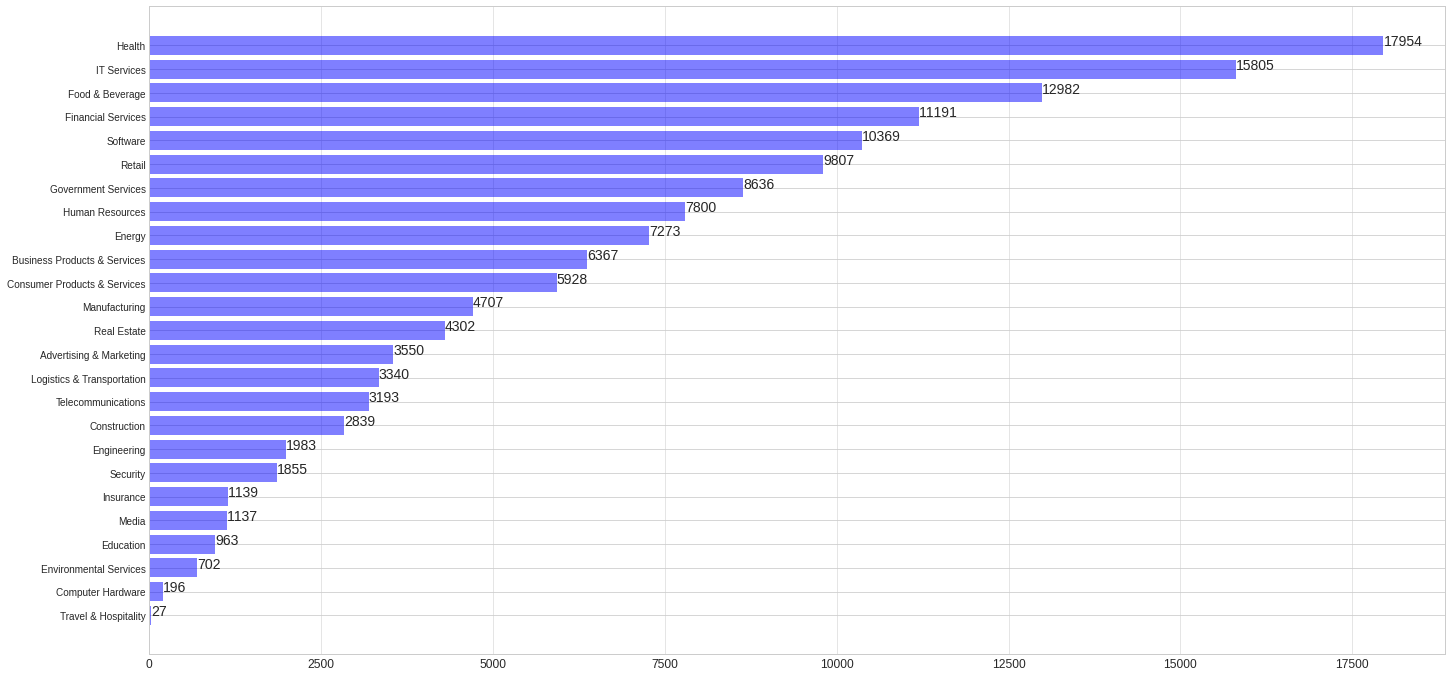

In [ ]:
#Number of employess in each industry

fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])
indus.sort_values(by = 'Employees_Sum', ascending=True, inplace = True)

x1 = indus['Industry']
x2 = indus['Employees_Sum']

for Index, Sum in enumerate(indus['Employees_Sum']):
    ax.annotate(Sum, xy = (Sum,Index), size = 14)

plt.barh(x1,x2, color = 'blue', alpha = 0.5)
ax.xaxis.grid(linestyle = '-', linewidth = 0.5)
plt.xticks(size = 12)
plt.show()




In [ ]:
#indus.sort_values(by = 'Employees_Sum', ascending=False)

In [ ]:
#Columns with 2015 data
#filter_col = [col for col in data if col.startswith('2015')]

Exploratory Data Analysis - Financial Data (2015)


In [ ]:
#Base informations
Financials_2015 = data.iloc[0:,:13]

In [ ]:
Financials_2015.isnull().sum()

ID                0
Name              0
Industry          0
Description       1
Year Founded      0
Employees         0
State             0
City              0
Metro Area       11
2015 Revenue      1
2015 Expenses     1
2015 Profit       1
2015 Growth %     1
dtype: int64

In [ ]:
#The higest revenue in each industry

In [ ]:
best_revenue_2015 = pd.DataFrame(columns = Financials_2015.columns)

In [ ]:
financial_industry = Financials_2015.groupby('Industry')

In [ ]:
for revenue, industry in financial_industry:
  higest_revenue = industry.nlargest(n=1, columns = '2015 Revenue')
  best_revenue_2015 = best_revenue_2015.append(higest_revenue)

In [ ]:
best_revenue_2015['Avg_2015_Revenue'] = best_revenue_2015['2015 Revenue'].mean()

In [ ]:
best_revenue_2015['2015 Revenue'] - best_revenue_2015['Avg_2015_Revenue']

917    2821754.534
636     570327.474
56    -2478288.806
123    -160010.746
281    -771933.286
324     989604.324
615     823170.404
80     -620097.046
171   -2286528.506
79     -359616.236
230    1973665.824
511    3531044.084
612     601369.094
979     691062.394
28      598415.834
160    -395711.146
13     -220849.686
922   -1031389.066
216     366807.434
744   -1464032.166
527    -376851.146
972   -1027710.986
931    2033294.794
319     -39725.276
982   -3767772.096
dtype: float64

In [ ]:
Financials_2015['Revenue_per_Emp'] = Financials_2015.groupby('Industry').apply(lambda x: x['2015 Revenue']/x['Employees']).reset_index(level = 0, drop = True).round(2)

In [ ]:
Financials_2015['Revenue_per_Emp'] = Financials_2015['Revenue_per_Emp'].fillna(0)

In [ ]:
Financials_2015

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,360661.72
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,346017.82
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,203849.26
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",10725585.46,2694644.42,8030941.04,3.12,33517.45
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",7798447.11,3206651.60,4591795.52,5.60,324935.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,9134728.24,5152110.43,3982617.81,4.13,380613.68
996,997,Overviewparrot,Retail,An eco-friendly car cleaning service that clea...,2011,100,TX,Fort Worth,Dallas,12387130.09,1387784.06,10999346.03,4.31,123871.30
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,9849518.96,1786744.40,8062774.56,4.20,70353.71
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,6949706.40,689160.81,6260545.59,4.48,178197.60


In [ ]:
aggre = Financials_2015.groupby('State').agg({'2015 Revenue' : [np.mean, np.sum],'2015 Profit' : [np.mean, np. sum], '2015 Expenses' : [np.mean, np.sum]}).round(0)

In [ ]:
aggre.columns = [x + y.capitalize() for x,y in aggre.columns.values]

In [ ]:
aggre.reset_index(inplace = True)

In [ ]:
aggre.columns

Index(['State', '2015 RevenueMean', '2015 RevenueSum', '2015 ProfitMean',
       '2015 ProfitSum', '2015 ExpensesMean', '2015 ExpensesSum'],
      dtype='object')

In [ ]:
aggre.rename(columns = {'2015 ExpensesSum' : '2015_Expenses_Sum', '2015 ExpensesMean' : '2015_Expenses_Mean'}, inplace= True)

In [ ]:
aggre.rename(columns = {'2015 RevenueMean' : '2015_Revenue_Mean',
                        '2015 RevenueSum' : '2015_Revenue_Sum',
                        '2015 ProfitMean' : '2015_Profit_Mean',
                        '2015 ProfitSum' : '2015_Profit_Sum'
}
,inplace = True
)

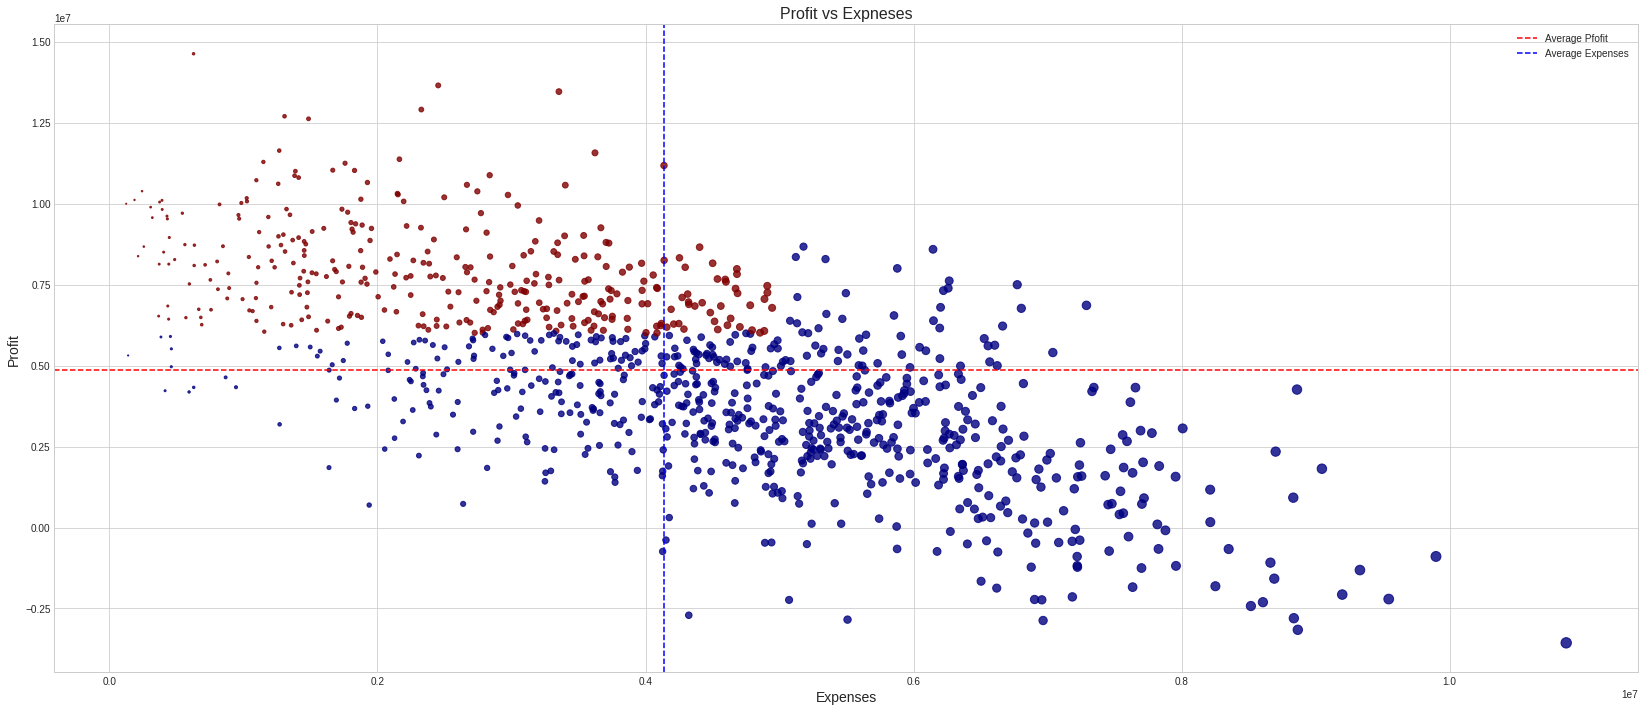

In [ ]:
fig = plt.figure(figsize=(22,9))
ax = fig.add_axes([0,0,1,1])

#x1 = aggre['2015_Expenses_Sum'] 
#x2 = aggre['2015_Profit_Sum']

#mask1 = Financials_2015['2015 Profit'] > 60000
#mask2 = Financials_2015['2015 Expenses'] < 800000
#Financials_2015[mask1&mask2]


# x3 & x4 - Les't point out only startups with Prof. > 6 mln and Exp. < 5 mln

x1  = Financials_2015['2015 Expenses'] 
x2 = Financials_2015['2015 Profit']
x3 = Financials_2015['2015 Profit'] > 6000000
x4 = Financials_2015['2015 Expenses'] < 5000000

plt.title('Profit vs Expneses', size = 16)
plt.ylabel('Profit', size = 14)
plt.xlabel('Expenses', size = 14)


ax.axhline( y = x2.mean(),
           color = 'r',
           linestyle = '--',
           label = 'Average Pfofit')

ax.axvline( x = x1.mean(),
           color = 'b',
           linestyle = '--',
           label ='Average Expenses'
           )

plt.scatter(x1, x2, s = x1/100000, c = [x3 & x4], alpha = 0.8, cmap='jet')
ax.legend()

In [ ]:
Financials_2015

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,360661.72
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,346017.82
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,203849.26
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",10725585.46,2694644.42,8030941.04,3.12,33517.45
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",7798447.11,3206651.60,4591795.52,5.60,324935.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,9134728.24,5152110.43,3982617.81,4.13,380613.68
996,997,Overviewparrot,Retail,An eco-friendly car cleaning service that clea...,2011,100,TX,Fort Worth,Dallas,12387130.09,1387784.06,10999346.03,4.31,123871.30
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,9849518.96,1786744.40,8062774.56,4.20,70353.71
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,6949706.40,689160.81,6260545.59,4.48,178197.60


**The cities with the higest revenue and the lowest expenses**


In [ ]:
Financials_2015['Expenses_per_Emp'] = Financials_2015.groupby('Industry').apply(lambda x: x['2015 Expenses']/x['Employees']).reset_index(level = 0, drop = True).round(2)

In [ ]:
Financials_2015.head(3)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp,Expenses_per_Emp
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,0.65,360661.72,32161.42
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,5.20,346017.82,59702.69
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,3.17,203849.26,27483.57


In [ ]:
Financials_2015.groupby('Employees')['2015 Revenue'].transform(lambda x: np.sum(x))


0      2.593278e+08
1      7.331843e+07
2      8.198885e+07
3      1.072559e+07
4      1.397817e+08
           ...     
995    1.397817e+08
996    9.273088e+07
997    4.859070e+07
998    6.218556e+07
999    1.397817e+08
Name: 2015 Revenue, Length: 1000, dtype: float64

In [ ]:
print( "(" + Financials_2015['State'] + ")" + Financials_2015['City'] )

0            (TN)Franklin
1      (PA)Newtown Square
2         (IL)Tinley Park
3          (SC)Greenville
4        (WI)New Holstein
              ...        
995          (MN)Woodbury
996        (TX)Fort Worth
997              (MI)Troy
998        (CA)San Rafael
999       (CA)Los Angeles
Length: 1000, dtype: object


In [ ]:
def stan(stan, miasto):
  return "(" + stan + ")" + " "+ miasto

In [ ]:
Financials_2015['Location'] = stan(Financials_2015['State'],Financials_2015['City'])

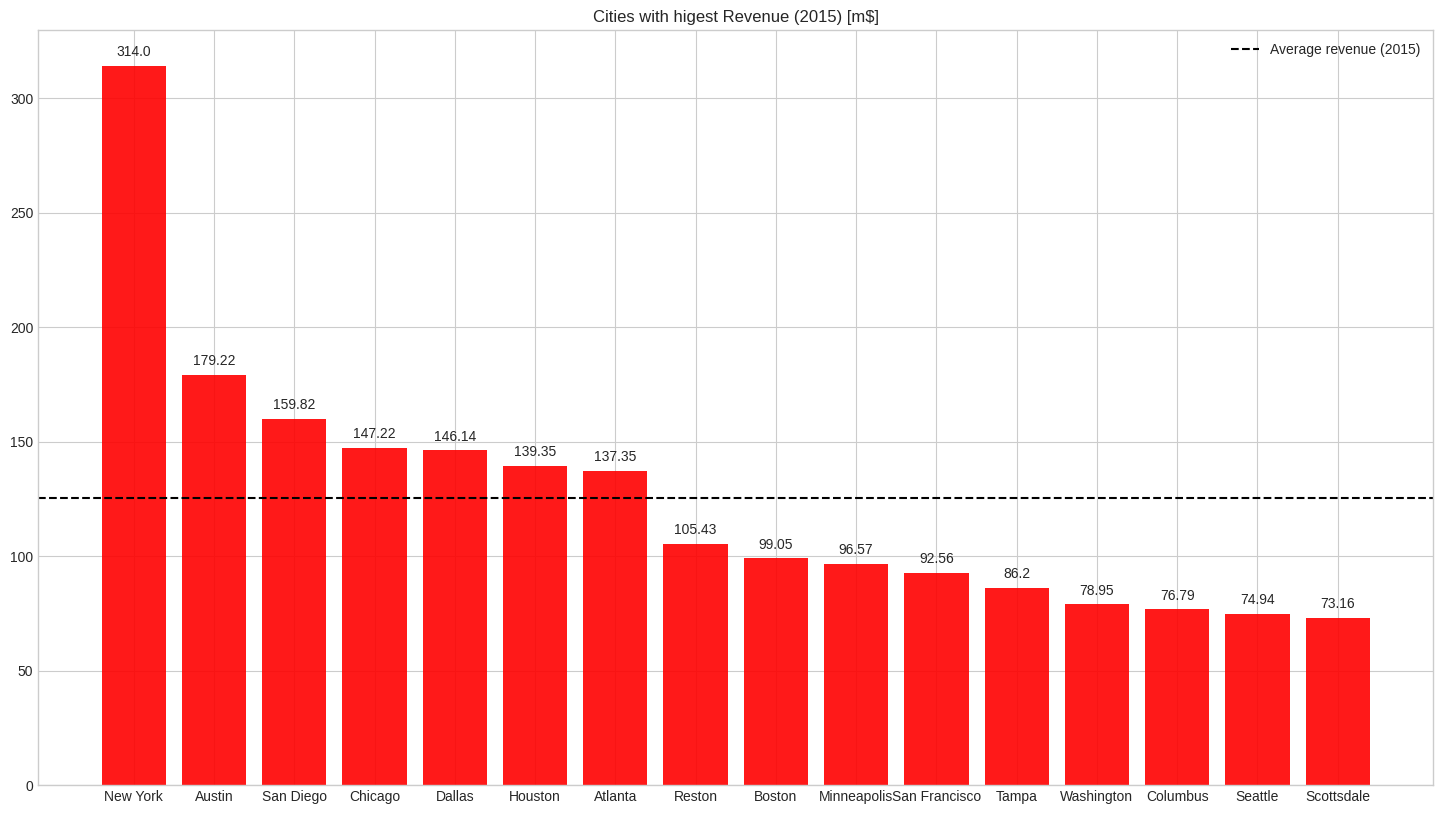

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (18,10), dpi = 100)
plt.style.use('seaborn-whitegrid')

Cities = Financials_2015.groupby('City')['2015 Revenue'].sum().sort_values(ascending = False).reset_index()

x = Cities['City'][0:16]
y = Cities['2015 Revenue']/1000000
y1 = y[0:16]

ax.bar(x,y1, color='red', alpha =0.9)

ax.axhline(y = y1.mean(),
	color = 'black',
	linestyle = '--',
	label = 'Average revenue (2015)');

ax.set(title = 'Cities with higest Revenue (2015) [m$]')

ax.legend()


for i, p in enumerate(ax.patches):
    ax.annotate(y1[i].round(2), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', rotation=0, xytext=(0, 10), textcoords='offset points')

In [ ]:
Cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          507 non-null    object 
 1   2015 Revenue  507 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [ ]:
Cities = Financials_2015.groupby('City')['2015 Revenue'].sum().sort_values(ascending = False).reset_index()

In [ ]:
Cities['2015 Revenue']/1000000

0      313.998309
1      179.221908
2      159.820831
3      147.217934
4      146.137694
          ...    
502      4.528393
503      4.484095
504      4.475874
505      3.367964
506      1.614585
Name: 2015 Revenue, Length: 507, dtype: float64

In [ ]:
Financials_2015.describe().round(2)

,ID,Year Founded,Employees,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp,Expenses_per_Emp
count,1000.00,1000.00,1000.00,999.00,999.00,999.00,999.00,1000.00,999.00
mean,500.50,2010.34,144.04,8999809.53,4140194.59,4859614.94,3.99,inf,inf
std,288.82,3.16,388.34,2084022.63,1933533.84,2889166.01,1.02,NaN,NaN
min,1.00,1999.00,0.00,1614585.24,125634.96,-3560690.02,0.65,0.00,395.43
25%,250.75,2010.00,24.00,7639032.43,2778565.04,2871744.41,3.30,71515.20,27244.03
50%,500.50,2011.00,45.50,8992759.41,4191046.22,4935880.94,4.03,189017.25,71355.74
75%,750.25,2012.00,120.00,10342000.48,5457733.88,6815965.19,4.69,390030.58,172594.80
max,1000.00,2014.00,7125.00,16810051.07,10869101.10,14624533.49,7.84,inf,inf


In [ ]:
Financials_2015['2015 Growth %'] = Financials_2015['2015 Growth %']*100

In [ ]:
Financials_2015['2015 Growth %'] = Financials_2015['2015 Growth %'].astype('str').str.split('.').str[0]+'%'

In [ ]:
#def percent_formating(kolumna):
    #kolumna.astype('str').str.split('.').str[0]+'%'

In [ ]:
Financials['2014 Growth %'].astype('str').str.split('.').str[0]+'%'

0      4%
1      0%
2      4%
3      0%
4      2%
       ..
995    4%
996    3%
997    2%
998    4%
999    3%
Name: 2014 Growth %, Length: 1000, dtype: object

In [ ]:
def percent_formating(zmienna,kolumna):
    zk = zmienna[kolumna]*100
    zmienna[kolumna] = zk.astype('str').str.split('.').str[0]+'%'

In [ ]:
#percent_formating(Financials,'2014 Growth %')

In [ ]:
Financials

,ID,Name,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,2,Unimattax,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,3,Lexila,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,4,Greenfax,7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,5,Saoace,10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,9144856.60,4755994.87,4388861.73,3.92,1859674,911725.27,947948.73,4.37,346308.01,147169.32,199138.69
996,997,Overviewparrot,9134728.24,5152110.43,3982617.81,4.13,1780432,907612.89,872819.11,3.79,371697.70,128087.21,243610.49
997,998,Belaguerra,12387130.09,1387784.06,10999346.03,4.31,2334555,250486.00,2084069.00,2.94,592526.65,60748.53,531778.12
998,999,Moviespotter,9849518.96,1786744.40,8062774.56,4.20,1893587,418019.42,1475567.58,4.37,352623.28,92720.68,259902.60


In [ ]:
Financials_2015

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,Revenue_per_Emp,Expenses_per_Emp,Location
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,9016542.89,804035.40,8212507.49,65%,360661.72,32161.42,(TN) Franklin
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,12456641.64,2149297.00,10307344.65,520%,346017.82,59702.69,(PA) Newtown Square
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,7746272.07,1044375.49,6701896.58,317%,203849.26,27483.57,(IL) Tinley Park
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",10725585.46,2694644.42,8030941.04,312%,33517.45,8420.76,(SC) Greenville
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",7798447.11,3206651.60,4591795.52,560%,324935.30,133610.48,(WI) New Holstein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,9134728.24,5152110.43,3982617.81,413%,380613.68,214671.27,(MN) Woodbury
996,997,Overviewparrot,Retail,An eco-friendly car cleaning service that clea...,2011,100,TX,Fort Worth,Dallas,12387130.09,1387784.06,10999346.03,430%,123871.30,13877.84,(TX) Fort Worth
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,9849518.96,1786744.40,8062774.56,420%,70353.71,12762.46,(MI) Troy
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,6949706.40,689160.81,6260545.59,448%,178197.60,17670.79,(CA) San Rafael


In [ ]:
#Financials['2015 Growth %'] = pd.Series(["{0:.2f}%".format(val * 100) for val in Financials['2015 Growth %']], index = Financials.index)

In [ ]:
#Financials.sort_values(by='2015 Growth %', ascending= False).head(3)

,ID,Name,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
181,182,Rankfind,11210769.07,1837223.32,9373545.75,7.84,1268659,234353.57,1034305.43,6.14,177683.33,31939.64,145743.69
350,351,Matelectronics,12683504.31,3205936.14,9477568.17,7.76,1447297,354424.97,1092872.03,5.24,231938.62,69954.60,161984.02
531,532,Wimpleddrift,8836311.51,4138631.97,4697679.54,7.69,1016714,579766.24,436947.76,7.50,119613.41,67902.01,51711.40


In [ ]:
#data['2015 Growth %'] = pd.Series(["{0:.2f}%".format(val *100) for val in data['2015 Growth %']], index = data.index)

In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data['2015 Growth %'].mean()

3.9895195195195168

In [ ]:
cities_growth = data.groupby('City')['2015 Growth %'].apply(lambda x: np.mean(x)).round(2).reset_index()

In [ ]:
cities_growth =pd.DataFrame(cities_growth)

In [ ]:
cities_growth

,City,2015 Growth %
0,Addison,4.02
1,Alexandria,3.13
2,Aliso Viejo,3.37
3,Allentown,3.42
4,Allston,4.71
...,...,...
502,fort washington,3.60
503,henderson,4.81
504,long beach,5.09
505,portage,5.35


In [ ]:
cities_growth['2015 Growth %'] = pd.Series(["{0:.2f}%".format(val *100) for val in cities_growth['2015 Growth %']], index = cities_growth.index)

In [ ]:
cities_growth = cities_growth.sort_values(by = '2015 Growth %', ascending=False)[0:16]

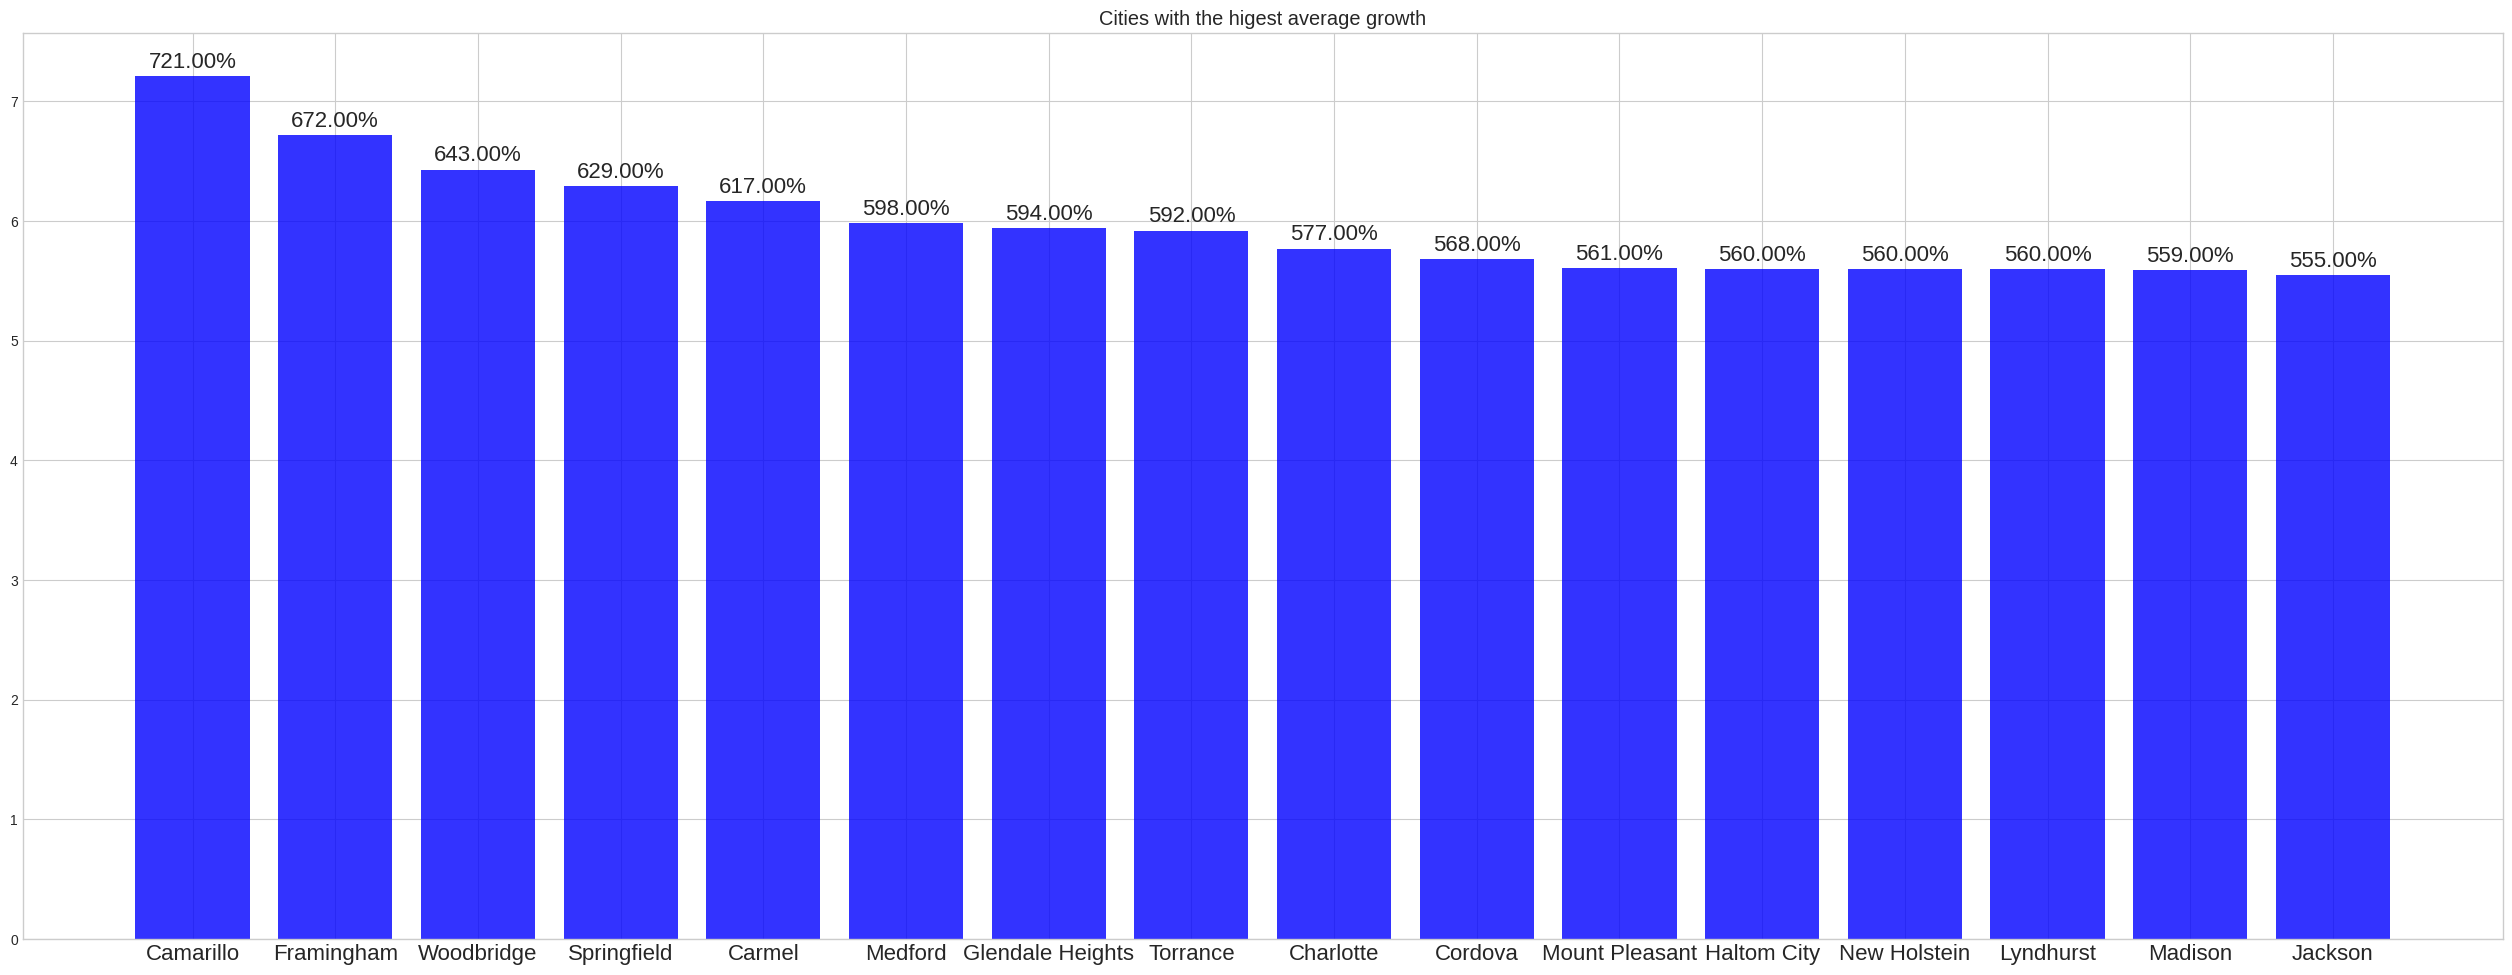

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (32,12), dpi = 100)
plt.style.use('seaborn-whitegrid')

a1 = cities_growth['City']
b1 = cities_growth['2015 Growth %']

ax.bar(a1,b1, color = 'blue', alpha = 0.8)

ax.set(title = 'Cities with the higest average growth')

ax.axes.get_yaxis().set_visible(True) #Hide y axis
plt.xticks(fontsize=16)


procenty = pd.Series(["{0:.2f}%".format(val *100) for val in cities_growth['2015 Growth %'].reset_index(drop=True,level=0)], index = cities_growth.index)
procenty.reset_index(drop = True, level = 0, inplace = True)

for i, p in enumerate(ax.patches):
   ax.annotate(procenty[i], (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', rotation=0, xytext=(0, 10), textcoords='offset points', size = 16)

In [ ]:
b1.reset_index(drop=True,level=0,inplace=True)

In [ ]:
y1

0     313.998309
1     179.221908
2     159.820831
3     147.217934
4     146.137694
5     139.351022
6     137.346100
7     105.426442
8      99.051840
9      96.573872
10     92.556095
11     86.200003
12     78.946960
13     76.790760
14     74.938576
15     73.157636
Name: 2015 Revenue, dtype: float64

In [ ]:
b1

0     7.21
1     6.72
2     6.43
3     6.29
4     6.17
5     5.98
6     5.94
7     5.92
8     5.77
9     5.68
10    5.61
11    5.60
12    5.60
13    5.60
14    5.59
15    5.55
Name: 2015 Growth %, dtype: float64

In [ ]:
procenty.reset_index(drop = True, level = 0, inplace = True)